# 02 판다스 시작하기

## 02-1 데이터 집합 불러오기

In [1]:
import pandas

In [3]:
# 갭마인더 데이터 집합 불러오기(열이 탭으로 구분되어있음)
df = pandas.read_csv('/Users/seuli/Desktop/개발자/doit_pandas-master/data/gapminder.tsv', sep='\t')

In [4]:
# pandas= pd 줄여서 쓰자 !
import pandas as pd
df = pd.read_csv('/Users/seuli/Desktop/개발자/doit_pandas-master/data/gapminder.tsv', sep='\t')

In [5]:
# 불러온 데이터 집합 살펴보기 : head 메소드
print(df.head())

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106


In [6]:
# 자료형 출력 : type 메소드
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [8]:
# 행과 열의 크기 확인 : shape 속성
print(df.shape)

(1704, 6)


In [9]:
# 데이터 프레임 열 이름 확인 : columns 속성
print(df.columns)

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')


In [10]:
# 데이터 프레임 구성하는 값의 자료형 확인 : dtypes 속성 & info 메서드(좀 더 자세함)
print(df.dtypes)

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null object
continent    1704 non-null object
year         1704 non-null int64
lifeExp      1704 non-null float64
pop          1704 non-null int64
gdpPercap    1704 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB
None


## 02-2 데이터 추출하기

In [12]:
# 열단위 데이터 추출하기 : 대괄호, 작은따옴표, 열이름 사용
country_df = df['country']

print(type(country_df))
# 1개의 열 추출 -> series

<class 'pandas.core.series.Series'>


In [13]:
print(country_df.head())

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object


In [14]:
print(country_df.tail())

1699    Zimbabwe
1700    Zimbabwe
1701    Zimbabwe
1702    Zimbabwe
1703    Zimbabwe
Name: country, dtype: object


In [15]:
# 2개 이상의 열 추출 -> dataframe
subset = df[['country', 'continent', 'year']]
print(type(subset))

<class 'pandas.core.frame.DataFrame'>


In [16]:
print(subset.head())

       country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
3  Afghanistan      Asia  1967
4  Afghanistan      Asia  1972


In [17]:
print(subset.tail())

       country continent  year
1699  Zimbabwe    Africa  1987
1700  Zimbabwe    Africa  1992
1701  Zimbabwe    Africa  1997
1702  Zimbabwe    Africa  2002
1703  Zimbabwe    Africa  2007


In [19]:
# loc 속성(인덱스 기준)으로 행 데이터 추출 
print(df.loc[0])

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object


In [20]:
print(df.loc[99])

country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap       721.186
Name: 99, dtype: object


In [21]:
# 인덱스에 없는 값은 오류발생
print(df.loc[-1])

KeyError: -1

In [22]:
# 그럼 loc 속성으로 마지막 행 데이터 추출하고 싶으면? 방법 1
number_of_rows = df.shape[0]
    #shape[0]으로 행 크기 알아내기
last_row_index = number_of_rows -1
    #0부터 시작이니까 하나 빼주자
print(df.loc[last_row_index])

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object


In [23]:
# loc속성으로 마지막 행 데이터 추출 : 방법 2
# tail 메서드 
print(df.tail(n=1))

       country continent  year  lifeExp       pop   gdpPercap
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298


In [25]:
# 여러개 추출해보기
print(df.loc[[0, 99, 999]])

         country continent  year  lifeExp       pop    gdpPercap
0    Afghanistan      Asia  1952   28.801   8425333   779.445314
99    Bangladesh      Asia  1967   43.453  62821884   721.186086
999     Mongolia      Asia  1967   51.253   1149500  1226.041130


In [27]:
# tail 메소드와 loc 속성이 반환하는 자료형은 다르다
# loc 속성 -> 시리즈
# tail 메서드 -> 데이터프레임
subset_loc = df.loc[0]
subset_tail = df.tail(n=1)

print(type(subset_loc))
print(type(subset_tail))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [28]:
# 하지만 loc 속성으로 여러개 추출 -> 데이터프레임
a = df.loc[[0, 99, 999]]
print(type(a))

<class 'pandas.core.frame.DataFrame'>


In [29]:
# iloc 속성(행번호(데이터순서) 기준) 사용하여 데이터 추출
print(df.iloc[1])

country      Afghanistan
continent           Asia
year                1957
lifeExp           30.332
pop              9240934
gdpPercap        820.853
Name: 1, dtype: object


In [30]:
print(df.iloc[99])

country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap       721.186
Name: 99, dtype: object


In [31]:
# iloc 속성은 음수 사용가능 ! 
# 음수 이용하여 마지막 행 데이터 추출하기
print(df.iloc[-1])

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object


In [32]:
# 존재하지 않는 행번호 전달하면 오류남
print(df.iloc[1710])

IndexError: single positional indexer is out-of-bounds

In [34]:
# 데이터 한번에 여러개 추출하기
print(df.iloc[[0, 99, 999]])

         country continent  year  lifeExp       pop    gdpPercap
0    Afghanistan      Asia  1952   28.801   8425333   779.445314
99    Bangladesh      Asia  1967   43.453  62821884   721.186086
999     Mongolia      Asia  1967   51.253   1149500  1226.041130


In [35]:
# 슬라이싱 구문(:)으로 데이터 추출
# : 는 모든 행 이라는 뜻 
subset = df.loc[:, ['year', 'pop']]
print(subset.head())

# loc 속성이니까 열 지정값에 정수리스트 오면 X

   year       pop
0  1952   8425333
1  1957   9240934
2  1962  10267083
3  1967  11537966
4  1972  13079460


In [36]:
subset = df.iloc[:, [2, 4, -1]]
print(subset.head())

# iloc 속성이니까 열 지정값에 문자열 리스트 오면 X

   year       pop   gdpPercap
0  1952   8425333  779.445314
1  1957   9240934  820.853030
2  1962  10267083  853.100710
3  1967  11537966  836.197138
4  1972  13079460  739.981106


In [38]:
# range 메소드로 데이터 추출하기
# range 메소드는 제네레이터를 반환. iloc 속성을 제네레이터로 데이터 추출을 할 수 없으므로 리스트로 변환시켜준다.
small_range = list(range(5))
print(small_range)

[0, 1, 2, 3, 4]


In [41]:
print(type(small_range))

<class 'list'>


In [42]:
subset = df.iloc[:, small_range]
print(subset.head())

       country continent  year  lifeExp       pop
0  Afghanistan      Asia  1952   28.801   8425333
1  Afghanistan      Asia  1957   30.332   9240934
2  Afghanistan      Asia  1962   31.997  10267083
3  Afghanistan      Asia  1967   34.020  11537966
4  Afghanistan      Asia  1972   36.088  13079460


In [43]:
small_range = list(range(3,6))
print(small_range)

[3, 4, 5]


In [44]:
subset = df.iloc[:, small_range]
print(subset.head())

   lifeExp       pop   gdpPercap
0   28.801   8425333  779.445314
1   30.332   9240934  820.853030
2   31.997  10267083  853.100710
3   34.020  11537966  836.197138
4   36.088  13079460  739.981106


In [46]:
    #  range(0, 6, 2) : 0에서 6사이숫자(6은 X) 가져오는데 2만큼 건너뛰어
small_range = list(range(0, 6, 2))
subset = df.iloc[:, small_range]
print(subset.head())

       country  year       pop
0  Afghanistan  1952   8425333
1  Afghanistan  1957   9240934
2  Afghanistan  1962  10267083
3  Afghanistan  1967  11537966
4  Afghanistan  1972  13079460


In [47]:
# 슬라이싱 구문과 range 메서드 비교하기
subset = df.iloc[:, :3]
print(subset.head())
    # 슬라이싱을 더 선호 -> 제네레이터를 리스트 변환하는 등의 과정 거치치 않아도 되니까 
    # list(range(3))과 [:3]의 결괏값은 동일하다

       country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
3  Afghanistan      Asia  1967
4  Afghanistan      Asia  1972


In [50]:
subset = df.iloc[:, 0:6:2]
print(subset.head())

       country  year       pop
0  Afghanistan  1952   8425333
1  Afghanistan  1957   9240934
2  Afghanistan  1962  10267083
3  Afghanistan  1967  11537966
4  Afghanistan  1972  13079460


In [51]:
# iloc 속성으로 0, 99, 999번째 행의 0, 3, 5번째 열 데이터 추출하기
print(df.iloc[[0, 99, 999], [0, 3, 5]])

         country  lifeExp    gdpPercap
0    Afghanistan   28.801   779.445314
99    Bangladesh   43.453   721.186086
999     Mongolia   51.253  1226.041130


In [53]:
# iloc 속성의 열 지정값으로 정수리스트를 전달하는 것은 나중에 어떤 데이터 추출하기 위한 코드인지 파악하지 못 할 수 있다.
# 따라서 loc 속성을 이용하여 열 지정값으로 열 이름 전달한다.
print(df.loc[[0, 99, 999], ['country', 'lifeExp', 'gdpPercap']])

         country  lifeExp    gdpPercap
0    Afghanistan   28.801   779.445314
99    Bangladesh   43.453   721.186086
999     Mongolia   51.253  1226.041130


In [54]:
print(df.loc[10:13, ['country', 'lifeExp', 'gdpPercap']])

        country  lifeExp    gdpPercap
10  Afghanistan   42.129   726.734055
11  Afghanistan   43.828   974.580338
12      Albania   55.230  1601.056136
13      Albania   59.280  1942.284244


## 02-3 기초적인 통계 계산하기

In [57]:
# lifeExp 열을 연도별로 그룹화하여 평균 계산
print(df.groupby('year')['lifeExp'].mean())
    # 과정1. groupby 메서드에 year열을 전달해 연도별로 그룹화함
    # 과정2. lifeExp 열을 평균을 구한것(mean)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


In [58]:
# 과정1 뜯어보기) 데이터 프레임 연도별로 그룹화 
grouped_year_df = df.groupby('year')
print(type(grouped_year_df))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [59]:
# 과정1 뜯어보기) 데이터프레임이 저장된 메모리 위치 확인
print(grouped_year_df)

In [61]:
# 과정2 뜯어보기) lifeExp 열 추출하여 확인하기
grouped_year_df_lifeExp = grouped_year_df['lifeExp']
print(type(grouped_year_df_lifeExp))
    # 열이 1개 라서 시리즈

<class 'pandas.core.groupby.generic.SeriesGroupBy'>


In [62]:
# 과정2 뜯어보기) mean 메소드(평균구하기) 사용하기
mean_lifeExp_by_year = grouped_year_df_lifeExp.mean()
print(mean_lifeExp_by_year)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


In [71]:
# 응용하기 - year, continent 열로 그룹화 한다음, lifeExp, gdpPercap 열 추출하여 평균값구하기
multi_group_var = df.groupby(['year', 'continent'])[['lifeExp', 'gdpPercap']].mean()
print(multi_group_var)

                  lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699


In [72]:
print(type(multi_group_var))

<class 'pandas.core.frame.DataFrame'>


In [74]:
# 그룹화한 데이터 개수 세기
# nunique 메서드 : 데이터 빈도수 구해줌
print(df.groupby('continent')['country'].nunique())

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64


## 02-4 그래프 그래기

In [75]:
# 그래프와 연관된 라이브러리 불러오기
%matplotlib inline
    # 주피터 노트북에서 그래프 그리기 위해서 사용하는 매직 함수
import matplotlib.pyplot as plt

In [76]:
global_yearly_life_expectancy = df.groupby('year')['lifeExp'].mean()
print(global_yearly_life_expectancy)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


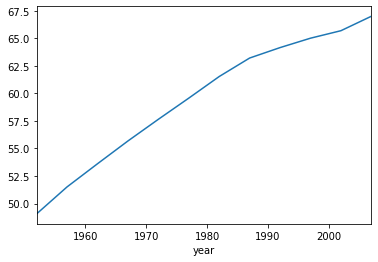

In [77]:
global_yearly_life_expectancy.plot()